In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def strToInt(x):
    if ',' in x or '$' in x:
        x = x.replace(',', '').replace('$', '')
        return int(x)
    else:
        x = int(x)
        return x

def strtofloat(x):
    if ',' in x:
        x = x.replace(',', '')
        x = float(x)* 1000000
        return x
    else:
        x = float(x)
        return x

In [3]:
tn_movie_budgets = pd.read_csv('data/tn.movie_budgets.csv')
tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].map(lambda x: strToInt(x) if type(x) == str else x)
tn_movie_budgets['domestic_gross'] = tn_movie_budgets['domestic_gross'].map(lambda x: strToInt(x) if type(x) == str else x)
tn_movie_budgets['worldwide_gross'] = tn_movie_budgets['worldwide_gross'].map(lambda x: strToInt(x) if type(x) == str else x)
tn_movie_budgets = tn_movie_budgets[tn_movie_budgets['worldwide_gross'] != 0]
tn_movie_budgets.info()
tn_movie_budgets.sort_values('worldwide_gross')[:20]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5415 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5415 non-null   int64 
 1   release_date       5415 non-null   object
 2   movie              5415 non-null   object
 3   production_budget  5415 non-null   int64 
 4   domestic_gross     5415 non-null   int64 
 5   worldwide_gross    5415 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 296.1+ KB


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5302,3,"Dec 11, 2015",American Hero,1000000,0,26
5335,36,"Nov 21, 2014",Food Chains,913000,0,176
5770,71,"Aug 14, 2008",The Rise and Fall of Miss Thang,10000,401,401
5518,19,"Oct 13, 2005",The Dark Hours,400000,423,423
5383,84,"Dec 31, 2014",Destiny,750000,0,450
5769,70,"Apr 1, 1996",Bang,10000,527,527
5466,67,"May 11, 2018",Higher Power,500000,528,528
5027,28,"Jan 1, 1993",Ed and his Dead Mother,1800000,673,673
5298,99,"Dec 13, 2002",The Jimmy Show,1000000,703,703
4081,82,"May 21, 2010",Perrierâs Bounty,6600000,828,828


In [4]:
tn_movie_budgets.describe()

,id,production_budget,domestic_gross,worldwide_gross
count,5415.000000,5.415000e+03,5.415000e+03,5.415000e+03
mean,50.227701,3.330801e+07,4.471128e+07,9.768800e+07
std,28.765167,4.248758e+07,6.960989e+07,1.788591e+08
min,1.000000,1.100000e+03,0.000000e+00,2.600000e+01
25%,25.000000,6.000000e+06,3.160708e+06,7.004834e+06
50%,50.000000,1.900000e+07,2.030022e+07,3.333987e+07
75%,75.000000,4.200000e+07,5.578249e+07,1.044590e+08
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09


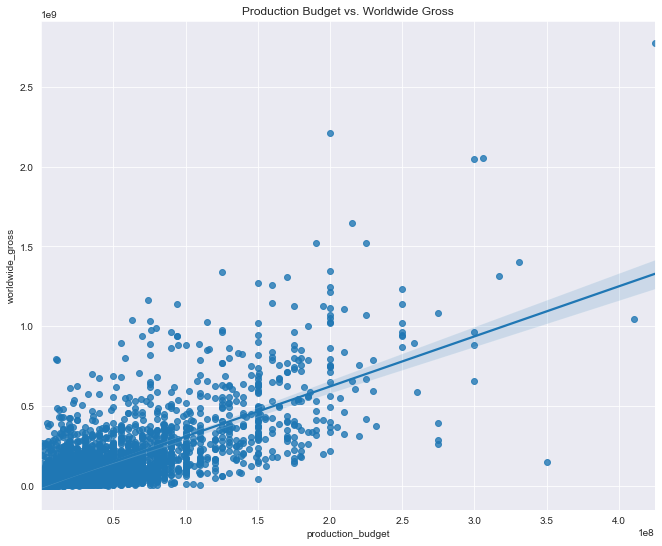

In [5]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(11,9))

x = tn_movie_budgets['production_budget']
y = tn_movie_budgets['worldwide_gross']

ax.set_title('Production Budget vs. Worldwide Gross')
ax.set_xlabel('Production Budget')
ax.set_ylabel("Worldwide Gross")
sns.regplot(x=x, y=y)
plt.show();

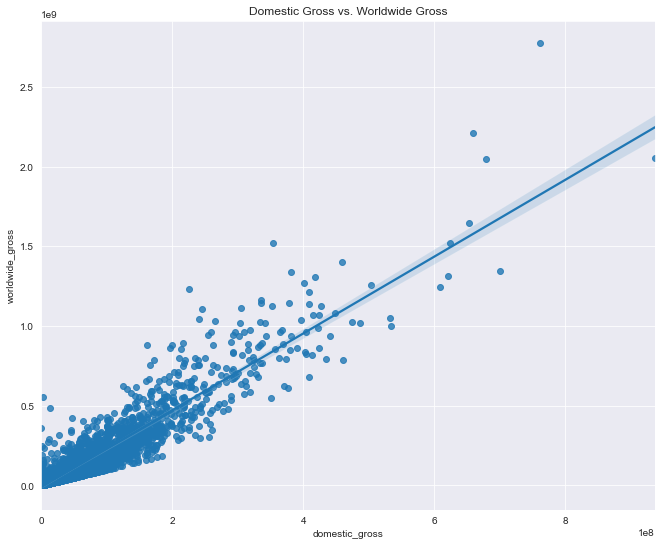

In [6]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(11,9))

x = tn_movie_budgets['domestic_gross']
y = tn_movie_budgets['worldwide_gross']

ax.set_title('Domestic Gross vs. Worldwide Gross')
ax.set_xlabel('Domestic Gross')
ax.set_ylabel("Worldwide Gross")
sns.regplot(x=x, y=y)
plt.show();

In [7]:
bom_movie_gross = pd.read_csv('data/bom.movie_gross.csv')
bom_movie_gross['foreign_gross'] = bom_movie_gross['foreign_gross'].map(lambda x: strtofloat(x) if type(x) == str else x)
bom_movie_gross['foreign_gross'].map(lambda x: type(x))
bom_movie_gross['worldwide_gross'] = bom_movie_gross['domestic_gross'] + bom_movie_gross['foreign_gross']

In [8]:
bom_movie_gross.sort_values('domestic_gross', ascending = False)[:10]
bom_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            3387 non-null   object 
 1   studio           3382 non-null   object 
 2   domestic_gross   3359 non-null   float64
 3   foreign_gross    2037 non-null   float64
 4   year             3387 non-null   int64  
 5   worldwide_gross  2009 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 158.9+ KB


<ipython-input-9-303d0c8a4dd3>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x, size=15, rotation=15)
<ipython-input-9-303d0c8a4dd3>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y, size=25)


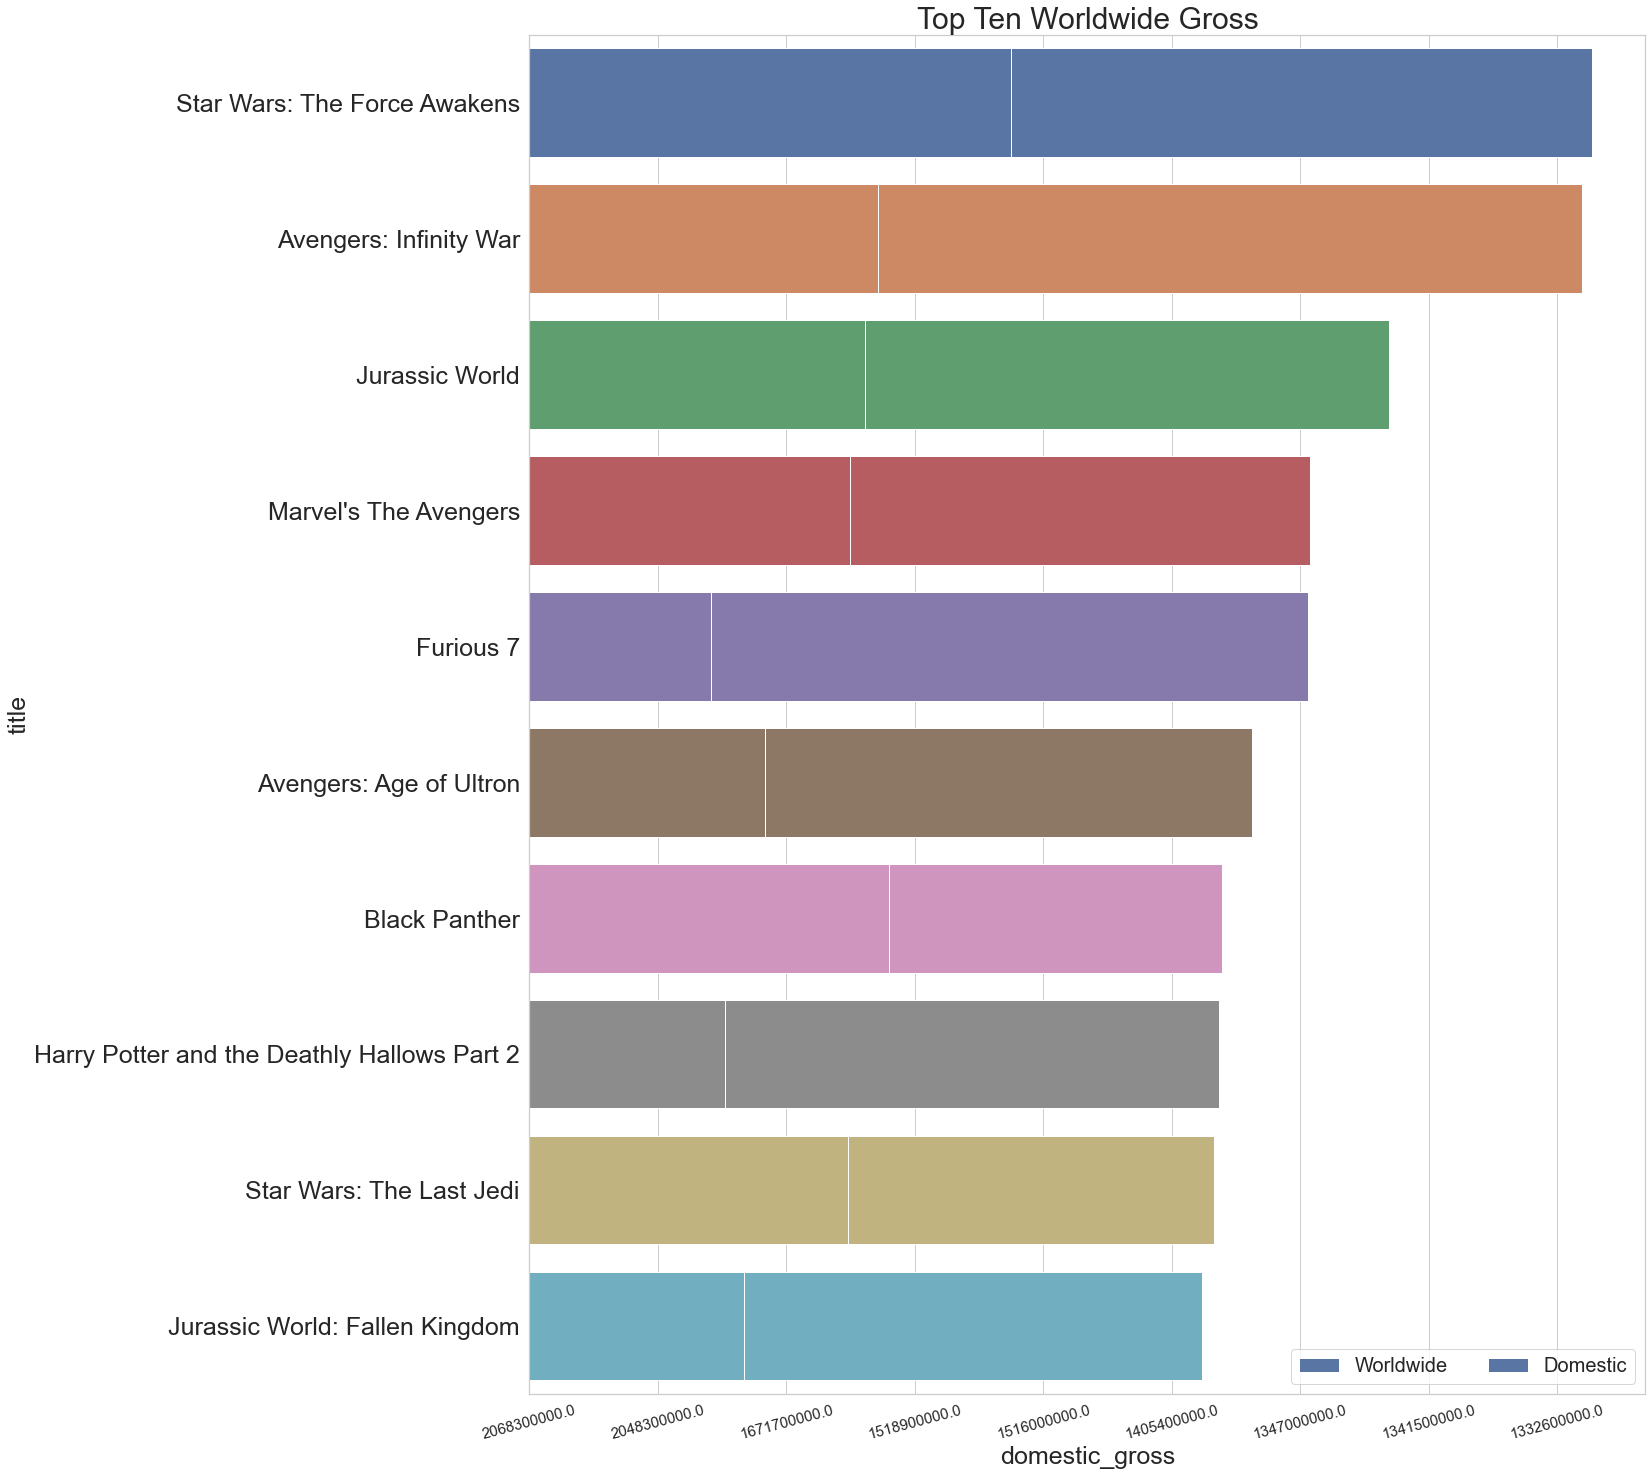

In [9]:
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize=(20, 25))

x = bom_movie_gross.sort_values('worldwide_gross', ascending = False)[:10]['worldwide_gross']
y = bom_movie_gross.sort_values('worldwide_gross', ascending = False)[:10]['title']
z = bom_movie_gross.sort_values('worldwide_gross', ascending = False)[:10]['domestic_gross']

ax.set_title('Top Ten Worldwide Gross', size=30)
ax.set_xlabel('Titles', size=25)
ax.set_xticklabels(x, size=15, rotation=15)
ax.set_yticklabels(y, size=25)
ax.set_ylabel("Worldwide Gross", size=25)
sns.set_color_codes('deep')
sns.barplot(x=x, y=y, orient='h', label='Worldwide')
sns.set_color_codes("pastel")
sns.barplot(x=z, y=y, orient='h', label='Domestic')
ax.legend(ncol=2, loc="lower right", frameon=True, fontsize=20);

# CLEAN FRANKENSTEIN BELOW

In [10]:
#Pulling CSVs
imdb_name_basics = pd.read_csv('data/imdb.name.basics.csv')
imdb_title_akas = pd.read_csv('data/imdb.title.akas.csv')
imdb_title_basics = pd.read_csv('data/imdb.title.basics.csv')
imdb_title_crew = pd.read_csv('data/imdb.title.crew.csv')
imdb_title_principals = pd.read_csv('data/imdb.title.principals.csv')
imdb_title_ratings = pd.read_csv('data/imdb.title.ratings.csv')

In [11]:
# Creating Frankenstein
imdb_title_basics.set_index('tconst', inplace=True)
imdb_title_ratings.set_index('tconst', inplace=True)
imdb_title_crew.set_index('tconst', inplace=True)
imdb_title_principals.set_index('tconst', inplace=True)
imdb_frankenstein = imdb_title_basics.join(imdb_title_ratings, how='left')
imdb_frankenstein = imdb_frankenstein.join(imdb_title_crew, how='left')
imdb_frankenstein = imdb_frankenstein.join(imdb_title_principals, how='left')
imdb_frankenstein.reset_index(inplace=True)
imdb_frankenstein.set_index('nconst', inplace=True)
imdb_name_basics.set_index('nconst', inplace=True)
imdb_frankenstein = imdb_frankenstein.join(imdb_name_basics, how='left')
imdb_frankenstein.reset_index(inplace=True)

In [12]:
imdb_title_basics[imdb_title_basics['primary_title'] == 'Avatar']

,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,
tt1775309,Avatar,Abatâ,2011,93.0,Horror


In [13]:
#Filtering to only include directors
imdb_frankenstein_bride = imdb_frankenstein[imdb_frankenstein['category'] == 'director']
# Creating new column to help determine more popular directors
imdb_frankenstein_bride['known_title_num'] = pd.Series(data=int)
imdb_frankenstein_bride['known_title_num'] = imdb_frankenstein_bride['known_for_titles'].str.len()

<ipython-input-13-dd76e5dfa970>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_frankenstein_bride['known_title_num'] = pd.Series(data=int)
<ipython-input-13-dd76e5dfa970>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_frankenstein_bride['known_title_num'] = imdb_frankenstein_bride['known_for_titles'].str.len()


In [14]:
# SORTING BY NUM OF KNOWN TITLES THEN DROPPING DUPLICATES
imdb_frankenstein_bride = imdb_frankenstein_bride.sort_values('known_title_num', ascending=False)
#DROPPING DUPLICATES IN ORIGINAL_TITLES
imdb_frankenstein_bride = imdb_frankenstein_bride.drop_duplicates(subset=['original_title'])
#DROPPING DUPLICATES IN PRIMARY_TITLES
imdb_frankenstein_bride = imdb_frankenstein_bride.drop_duplicates(subset=['primary_title'])
# #Dropping rows that do not have matching Titles
# imdb_frankenstein_bride['match'] = imdb_frankenstein_bride['original_title'] == imdb_frankenstein_bride['primary_title']
# imdb_frankenstein_bride = imdb_frankenstein_bride[imdb_frankenstein_bride['match'] == True]
imdb_frankenstein_bride

,nconst,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,directors,...,ordering,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles,known_title_num
621658,nm4291122,tt2329998,Khaos,Khaos,2012,95.0,Documentary,7.8,6.0,nm4291122,...,1.0,director,NaN,NaN,Ana Dumitrescu,NaN,NaN,"director,cinematographer,writer","tt1280016,tt3876730,tt2329998,tt6721826,tt3876...",59.0
621659,nm4291122,tt4921464,Même pas peur!,Même pas peur!,2015,100.0,Documentary,NaN,NaN,nm4291122,...,5.0,director,NaN,NaN,Ana Dumitrescu,NaN,NaN,"director,cinematographer,writer","tt1280016,tt3876730,tt2329998,tt6721826,tt3876...",59.0
621660,nm4291122,tt6721826,Licu: A Romanian Story,Licu: A Romanian Story,2017,86.0,"Documentary,Drama",7.8,35.0,nm4291122,...,1.0,director,NaN,NaN,Ana Dumitrescu,NaN,NaN,"director,cinematographer,writer","tt1280016,tt3876730,tt2329998,tt6721826,tt3876...",59.0
784055,nm5923758,tt10366330,Night Out,Night Out,2019,116.0,"Comedy,Thriller",8.1,10.0,nm5923758,...,4.0,director,NaN,NaN,Rakesh Adiga,NaN,NaN,"actor,director,writer","tt3878830,tt7159092,tt5567688,tt1846652,tt1036...",50.0
459190,nm2829835,tt9602058,It's Major,It's Major,2019,NaN,Comedy,NaN,NaN,nm2829835,...,5.0,director,NaN,NaN,Sanedria Potter-Holt,NaN,NaN,"producer,writer,director","tt9602058,tt8070198,tt5737946,tt6060392,tt9264928",49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028070,nm9990097,tt8736042,The Ukrainian Insurgent Army Alive: Orest,The Ukrainian Insurgent Army Alive: Orest,2017,36.0,"Biography,Documentary,Drama",NaN,NaN,"nm9990097,nm9990098",...,1.0,director,NaN,NaN,Maria Yaremchuk,NaN,NaN,"director,writer",NaN,NaN
1028094,nm9990679,tt8737124,Freshman Year,Freshman Year,2019,NaN,Drama,NaN,NaN,nm9990679,...,5.0,director,NaN,NaN,Jude Okwudiafor Johnson,NaN,NaN,"producer,director,actor",NaN,NaN
1028150,nm9992849,tt8742502,Jai Jagadeka Veera,Jai Jagadeka Veera,2015,99.0,Drama,NaN,NaN,nm9992849,...,3.0,director,NaN,NaN,P.S. Ramu,NaN,NaN,director,NaN,NaN
1028155,nm9992900,tt8742566,White Spot,White Spot,2018,92.0,"Adventure,Documentary,Drama",NaN,NaN,nm9992900,...,1.0,director,NaN,NaN,Tin Brendel,NaN,NaN,"writer,director,cinematographer",NaN,NaN


In [15]:
# DROPPING DEAD DIRECTORS
imdb_frankenstein_bride = imdb_frankenstein_bride[imdb_frankenstein_bride['death_year'].isna()]
imdb_frankenstein_bride.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119410 entries, 621658 to 1028157
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   nconst              119410 non-null  object 
 1   tconst              119410 non-null  object 
 2   primary_title       119410 non-null  object 
 3   original_title      119410 non-null  object 
 4   start_year          119410 non-null  int64  
 5   runtime_minutes     95276 non-null   float64
 6   genres              116693 non-null  object 
 7   averagerating       62466 non-null   float64
 8   numvotes            62466 non-null   float64
 9   directors           119382 non-null  object 
 10  writers             91385 non-null   object 
 11  ordering            119410 non-null  float64
 12  category            119410 non-null  object 
 13  job                 3618 non-null    object 
 14  characters          0 non-null       object 
 15  primary_name        119410 n

In [16]:
imdb_frankenstein_bride.columns

Index(['nconst', 'tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'averagerating', 'numvotes', 'directors',
       'writers', 'ordering', 'category', 'job', 'characters', 'primary_name',
       'birth_year', 'death_year', 'primary_profession', 'known_for_titles',
       'known_title_num'],
      dtype='object')

In [17]:
# Dropping unnecessary columns
imdb_frankenstein_bride.drop(labels=['nconst', 'tconst', 'directors', 'writers', 'ordering', 'category', 'job', 'characters', 'birth_year', 'death_year', 'primary_profession', 'known_for_titles', 'known_title_num'], axis=1, inplace=True)

C:\Users\chris\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [18]:
imdb_frankenstein_bride

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,primary_name
621658,Khaos,Khaos,2012,95.0,Documentary,7.8,6.0,Ana Dumitrescu
621659,Même pas peur!,Même pas peur!,2015,100.0,Documentary,NaN,NaN,Ana Dumitrescu
621660,Licu: A Romanian Story,Licu: A Romanian Story,2017,86.0,"Documentary,Drama",7.8,35.0,Ana Dumitrescu
784055,Night Out,Night Out,2019,116.0,"Comedy,Thriller",8.1,10.0,Rakesh Adiga
459190,It's Major,It's Major,2019,NaN,Comedy,NaN,NaN,Sanedria Potter-Holt
...,...,...,...,...,...,...,...,...
1028070,The Ukrainian Insurgent Army Alive: Orest,The Ukrainian Insurgent Army Alive: Orest,2017,36.0,"Biography,Documentary,Drama",NaN,NaN,Maria Yaremchuk
1028094,Freshman Year,Freshman Year,2019,NaN,Drama,NaN,NaN,Jude Okwudiafor Johnson
1028150,Jai Jagadeka Veera,Jai Jagadeka Veera,2015,99.0,Drama,NaN,NaN,P.S. Ramu
1028155,White Spot,White Spot,2018,92.0,"Adventure,Documentary,Drama",NaN,NaN,Tin Brendel


In [19]:
# Merging tn_movie_budgets with frankenstein
tn_movie_monster = tn_movie_budgets.merge(imdb_frankenstein_bride, how='inner', left_on='movie', right_on='primary_title')

In [20]:
tn_movie_monster.sort_values('worldwide_gross', ascending=False)[:50]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,primary_name
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,Avatar,Abatâ,2011,93.0,Horror,6.1,43.0,Atsushi Wada
31,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,Titanic,Titanic,2018,115.0,Family,NaN,NaN,Ravi Punj
4,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926.0,Joe Russo
25,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338.0,Colin Trevorrow
50,67,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794,Furious 7,Furious Seven,2015,137.0,"Action,Crime,Thriller",7.2,335074.0,James Wan
19,27,"May 4, 2012",The Avengers,225000000,623279547,1517935897,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",8.1,1183655.0,Joss Whedon
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",7.3,665594.0,Joss Whedon
30,42,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,Black Panther,Black Panther,2018,134.0,"Action,Adventure,Sci-Fi",7.3,516148.0,Ryan Coogler
84,13,"Jun 22, 2018",Jurassic World: Fallen Kingdom,170000000,417719760,1305772799,Jurassic World: Fallen Kingdom,Jurassic World: Fallen Kingdom,2018,128.0,"Action,Adventure,Sci-Fi",6.2,219125.0,J.A. Bayona
117,56,"Nov 22, 2013",Frozen,150000000,400738009,1272469910,Frozen,Frozen,2013,102.0,"Adventure,Animation,Comedy",7.5,516998.0,Chris Buck


In [27]:
top_100_directors = tn_movie_monster.sort_values('worldwide_gross', ascending=False)[:100][['primary_title', 'primary_name', 'start_year', 'worldwide_gross']]
top_100_directors

,primary_title,primary_name,start_year,worldwide_gross
0,Avatar,Atsushi Wada,2011,2776345279
31,Titanic,Ravi Punj,2018,2208208395
4,Avengers: Infinity War,Joe Russo,2018,2048134200
25,Jurassic World,Colin Trevorrow,2015,1648854864
50,Furious 7,James Wan,2015,1518722794
...,...,...,...,...
125,Ready Player One,Steven Spielberg,2018,579290136
149,The Croods,Chris Sanders,2013,573068425
600,Fifty Shades of Grey,Sam Taylor-Johnson,2015,570998101
212,The Smurfs,Raja Gosnell,2011,563749323


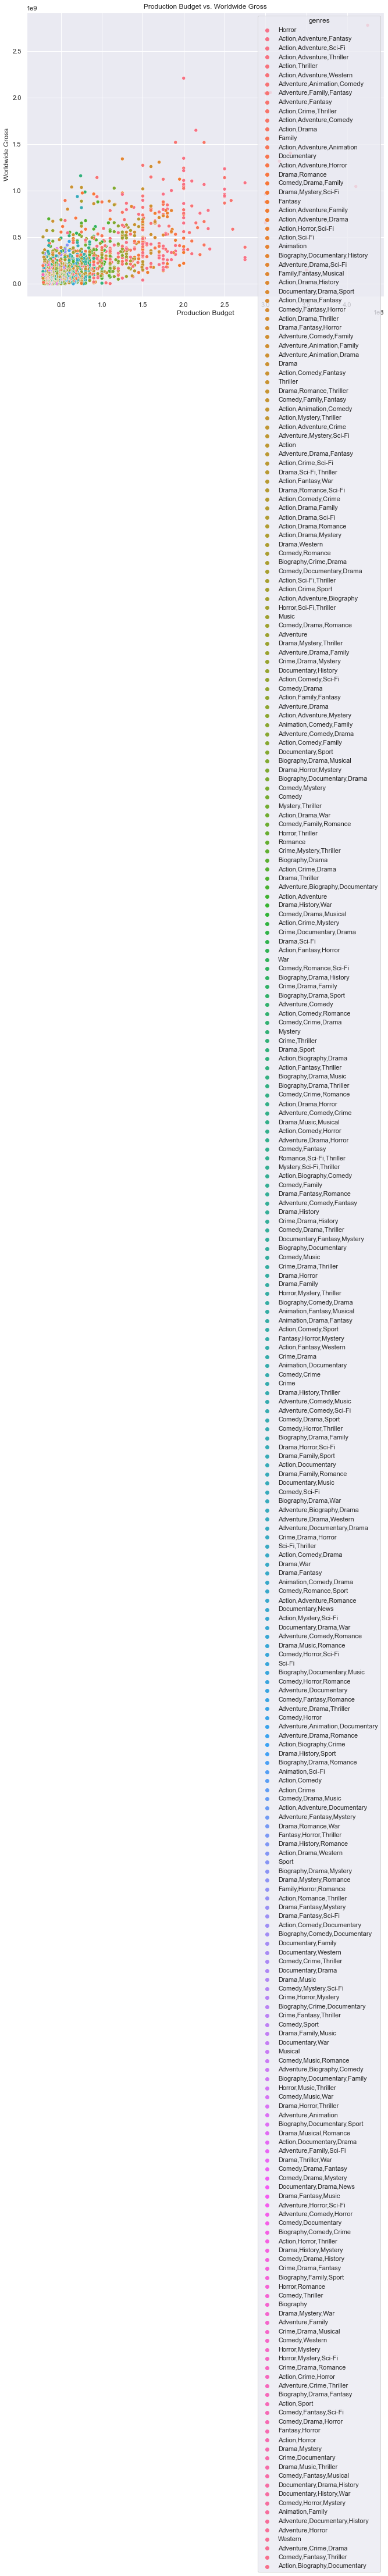

In [26]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(11,9))

x = tn_movie_budgets['production_budget']
y = tn_movie_budgets['worldwide_gross']

ax.set_title('Production Budget vs. Worldwide Gross')
ax.set_xlabel('Production Budget')
ax.set_ylabel("Worldwide Gross")
sns.scatterplot(x=x, y=y, hue= tn_movie_monster['genres'])
plt.show();

In [ ]:
# sns.pairplot(imdb_frankenstein_son, kind="scatter", hue="genres", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
# plt.show()